In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
desc_df = df.describe(include='all').T
desc_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


In [6]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [9]:
X[X.duplicated()].iloc[:1,2].count()

0

In [10]:
for c in ['RestingBP','Cholesterol']:
    print(f'Number of Zeros {c}',X[X[c] == 0].shape[0])


Number of Zeros RestingBP 1
Number of Zeros Cholesterol 172


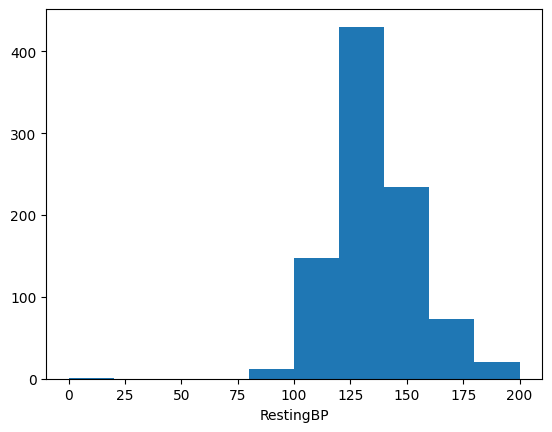

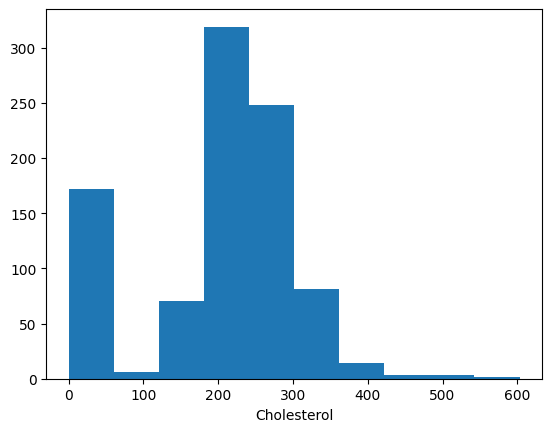

In [11]:
from matplotlib import pyplot as plt 
for col in ['RestingBP','Cholesterol']:
    plt.hist(X[col])
    plt.xlabel(col)
    plt.show()

In [12]:
cat_cols = desc_df['unique'].dropna().index.values
cat_cols

array(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
      dtype=object)

In [13]:
X['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(drop='first', sparse_output=False)
encoded = enc.fit_transform(X[cat_cols])
encoded_X = pd.DataFrame(encoded,columns=enc.get_feature_names_out(cat_cols))
X = pd.concat([X.drop(cat_cols,axis=1),encoded_X],axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54,150,195,0,122,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [17]:
corr_df = pd.concat([X,y],axis=1).corr()
corr_df.abs()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
Age,1.000000,0.254399,0.095282,0.198039,0.382045,0.258612,0.055750,0.218165,0.011335,0.032042,0.230566,0.136798,0.215793,0.185568,0.258067,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,0.112135,0.164803,0.005133,0.046153,0.041348,0.049855,0.116851,0.090447,0.155101,0.099207,0.096146,0.107589
Cholesterol,0.095282,0.100893,1.000000,0.260974,0.235792,0.050148,0.200092,0.150954,0.006634,0.017365,0.038470,0.133106,0.034166,0.050953,0.094027,0.232741
FastingBS,0.198039,0.070193,0.260974,1.000000,0.131438,0.052698,0.120076,0.140514,0.039249,0.026885,0.093028,0.127110,0.060451,0.107006,0.161730,0.267291
MaxHR,0.382045,0.112135,0.235792,0.131438,1.000000,0.160691,0.189186,0.253735,0.134580,0.100025,0.023801,0.157879,0.370425,0.342581,0.383397,0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,0.160691,1.000000,0.105734,0.262124,0.106212,0.032231,0.116719,0.055958,0.408752,0.283295,0.450577,0.403951
Sex_M,0.055750,0.005133,0.200092,0.120076,0.189186,0.105734,1.000000,0.161522,0.066486,0.004031,0.010634,0.063715,0.190664,0.116077,0.150942,0.305445
ChestPainType_ATA,0.218165,0.046153,0.150954,0.140514,0.253735,0.262124,0.161522,1.000000,0.256767,0.110679,0.107941,0.046111,0.300365,0.304667,0.357588,0.401924
ChestPainType_NAP,0.011335,0.041348,0.006634,0.039249,0.134580,0.106212,0.066486,0.256767,1.000000,0.122381,0.005010,0.042236,0.166030,0.072031,0.093583,0.212964
ChestPainType_TA,0.032042,0.049855,0.017365,0.026885,0.100025,0.032231,0.004031,0.110679,0.122381,1.000000,0.057719,0.011611,0.128105,0.010486,0.002087,0.054790


<Axes: >

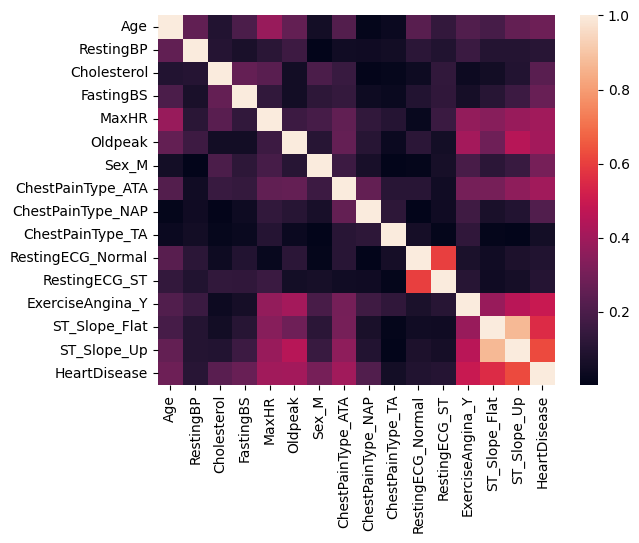

In [16]:
import seaborn as sbn 

sbn.heatmap(corr_df.abs())

No Feature selection is needed

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=30)
print("Train data shape:", X_train.shape,
      "\nVal data shape:",X_val.shape,
      "\nTest data shape:",X_test.shape)


Train data shape: (587, 15) 
Val data shape: (147, 15) 
Test data shape: (184, 15)


In [25]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=0,strategy='median')

X_train_imputed = imp.fit_transform(X_train)
X_val_imputed = imp.transform(X_val)
X_test_imputed = imp.transform(X_test)

X_train_imputed[:,1:3]

array([[130., 275.],
       [100., 222.],
       [120., 240.],
       ...,
       [122., 320.],
       [140., 169.],
       [155., 240.]])

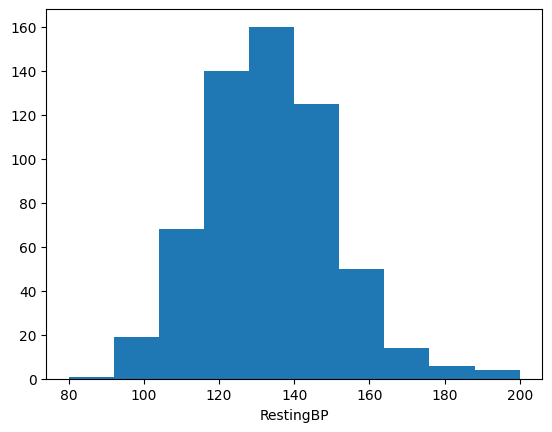

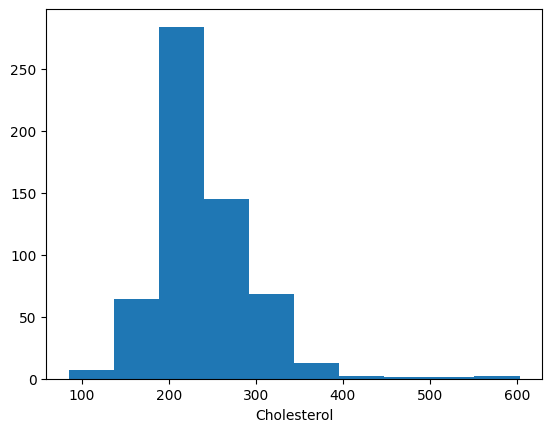

In [26]:
for i,lb in enumerate(['RestingBP','Cholesterol']):
    plt.hist(X_train_imputed[:,i+1:i+2])
    plt.xlabel(lb)
    plt.show()


In [24]:
#Check target labels are banaced

print("Positive values",y_train[y_train == 1].count(),y_train[y_train == 1].count()/y_train.count())
print("Negative values",y_train[y_train == 0].count(),y_train[y_train == 0].count()/y_train.count())


Positive values 316 0.5383304940374787
Negative values 271 0.4616695059625213


Almost Balanced, So we can safely use Accurecy metric to evaluate Model

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_imputed)
X_val_scaled = sc.transform(X_val_imputed)
X_test_scaled = sc.transform(X_test_imputed)

X_train_scaled

Now we can implement the folowing Algorithms and evaluate each:
 1. Logistic Regression
 2. KNN
 3. Support Vector Machine
 4. Decision Tree
 5. Random Forest